In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader as data 


In [2]:
start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start=start, end=end)
print(df.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.431896  6.446623  6.382908  6.414465  493729600
2010-01-05  6.443017  6.479383  6.409055  6.449629  601904800
2010-01-06  6.340532  6.468563  6.333920  6.443017  552160000
2010-01-07  6.328809  6.371487  6.282827  6.363973  477131200
2010-01-08  6.370887  6.371488  6.283129  6.320396  447610800


In [3]:

df = df.iloc[1:]  
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df.head()


,Close,High,Low,Open,Volume
Date,,,,,
2010-01-05,6.443017,6.479383,6.409055,6.449629,601904800
2010-01-06,6.340532,6.468563,6.333920,6.443017,552160000
2010-01-07,6.328809,6.371487,6.282827,6.363973,477131200
2010-01-08,6.370887,6.371488,6.283129,6.320396,447610800
2010-01-11,6.314687,6.401543,6.264797,6.395532,462229600


In [4]:
df = df.reset_index()
df.head()

,Date,Close,High,Low,Open,Volume
0,2010-01-05,6.443017,6.479383,6.409055,6.449629,601904800
1,2010-01-06,6.340532,6.468563,6.333920,6.443017,552160000
2,2010-01-07,6.328809,6.371487,6.282827,6.363973,477131200
3,2010-01-08,6.370887,6.371488,6.283129,6.320396,447610800
4,2010-01-11,6.314687,6.401543,6.264797,6.395532,462229600


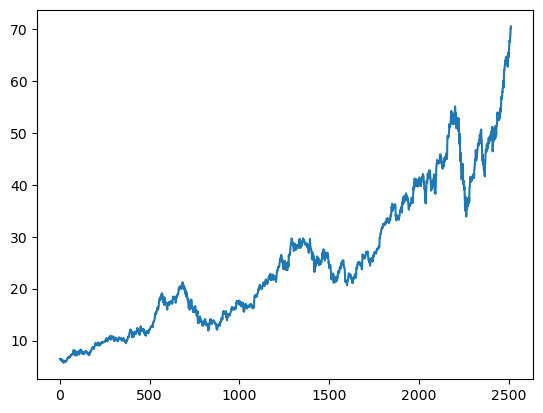

In [5]:
plt.plot(df.Close)

In [6]:
df.describe()

,Date,Close,High,Low,Open,Volume
count,2514,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,2015-01-01 00:42:57.565632512,25.149941,25.366716,24.916755,25.143604,2.995950e+08
min,2010-01-05 00:00:00,5.771907,5.890619,5.717809,5.781524,4.544800e+07
25%,2012-07-02 06:00:00,13.812039,13.954499,13.700756,13.846297,1.247611e+08
50%,2015-01-01 00:00:00,22.283612,22.455805,22.096481,22.251537,2.218420e+08
75%,2017-06-29 18:00:00,35.229927,35.642449,34.907162,35.290126,4.067000e+08
max,2019-12-30 00:00:00,70.485863,71.078233,69.663776,70.389138,1.880998e+09
std,NaN,13.901798,14.004223,13.779326,13.882425,2.353083e+08


In [7]:
df.shape

(2514, 6)

In [8]:
# data = pd.read_csv('Stock Prices Data Set.csv')
# data.head()

In [9]:
# data  = data.drop('symbol', axis=1)
# data.head()

In [10]:
# data = data.drop_duplicates(subset='date', keep='first')
# data.head()

In [11]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2509    57.137911
2510    57.335284
2511    57.571941
2512    57.799543
2513    58.026405
Name: Close, Length: 2514, dtype: float64

In [12]:
ma100.isna().sum()

99

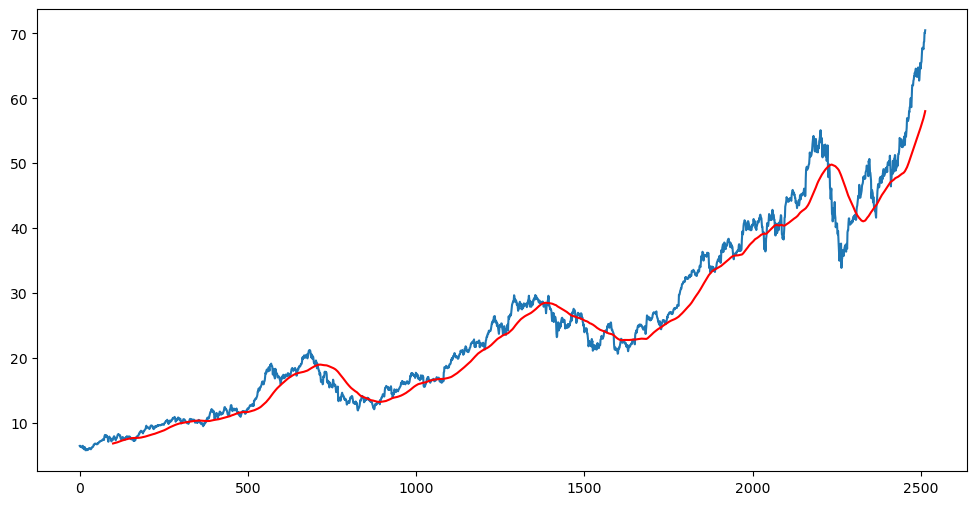

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.show()

In [14]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2509    52.096149
2510    52.223418
2511    52.356549
2512    52.487130
2513    52.616932
Name: Close, Length: 2514, dtype: float64

In [15]:
ma200.isna().sum()

199

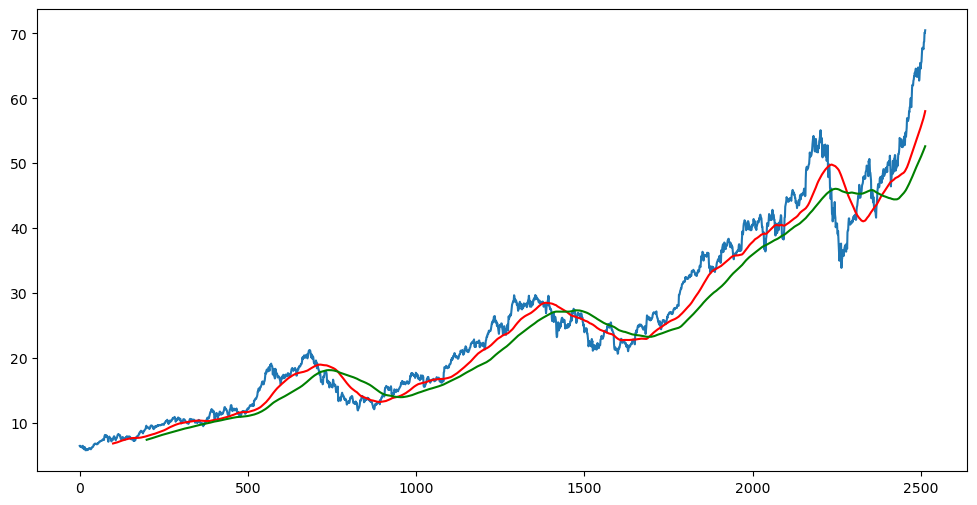

In [16]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')
plt.show()

In [17]:
# df = df.drop[['Date','Volumn'],axis=1]

In [18]:
# splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7):])
print(data_training.shape)
print(data_testing.shape)

(1759, 1)
(755, 1)


In [19]:
1758+754

2512

In [20]:
data_training.head()

,Close
0,6.443017
1,6.340532
2,6.328809
3,6.370887
4,6.314687


In [21]:
data_testing.head()

,Close
1759,26.961208
1760,26.751026
1761,26.827250
1762,26.797215
1763,26.933485


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [23]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02806505],
       [0.02377925],
       [0.02328901],
       ...,
       [0.88408411],
       [0.89123169],
       [0.88640235]])

In [25]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train

array([[[0.02806505],
        [0.02377925],
        [0.02328901],
        ...,
        [0.06682565],
        [0.06543064],
        [0.07704377]],

       [[0.02377925],
        [0.02328901],
        [0.02504864],
        ...,
        [0.06543064],
        [0.07704377],
        [0.08148034]],

       [[0.02328901],
        [0.02504864],
        [0.02269844],
        ...,
        [0.07704377],
        [0.08148034],
        [0.08644484]],

       ...,

       [[0.76974681],
        [0.77599338],
        [0.7914644 ],
        ...,
        [0.88823778],
        [0.8892999 ],
        [0.88186247]],

       [[0.77599338],
        [0.7914644 ],
        [0.80001709],
        ...,
        [0.8892999 ],
        [0.88186247],
        [0.88408411]],

       [[0.7914644 ],
        [0.80001709],
        [0.80424525],
        ...,
        [0.88186247],
        [0.88408411],
        [0.89123169]]])

In [26]:
x_train, y_train = np.array(x_train), np.array(y_train)


In [27]:
x_train.shape

(1659, 100, 1)

### Model 

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM


ImportError: cannot import name 'keras' from partially initialized module 'keras._tf_keras' (most likely due to a circular import) (/Users/aakashkhanal/anaconda3/lib/python3.11/site-packages/keras/_tf_keras/__init__.py)

In [37]:
!pip install tensorflow


In [42]:
!pip uninstall keras


Found existing installation: keras 3.10.0
Uninstalling keras-3.10.0:
  Would remove:
    /Users/aakashkhanal/anaconda3/lib/python3.11/site-packages/keras-3.10.0.dist-info/*
    /Users/aakashkhanal/anaconda3/lib/python3.11/site-packages/keras/*
Proceed (Y/n)? ^C
